# Capstone project - The battle of neighbourhoods

## Introduction and business problem

#### Introduction
Toronto is the provincial capital of Ontario. With a recorded population of 2,731,571 in 2016, it is the most populous city in Canada and the fourth most populous city in North America. The Greater Toronto Area (GTA) as a whole had a 2016 population of 6,417,516. The city covers an area of 630.20 square kilometres (243.32 sq mi) and comprises six districts – East York, Etobicoke, North York, Old Toronto, Scarborough and York – which were amalgamated to form Toronto's present boundaries in 1998. The city is the anchor of the Golden Horseshoe, an urban agglomeration of 9,245,438 people (as of 2016) surrounding the western end of Lake Ontario. Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world.
The diverse population of Toronto reflects its current and historical role as an important destination for immigrants to Canada. More than 50 percent of residents belong to a visible minority population group, and over 200 distinct ethnic origins are represented among its inhabitants. While the majority of Torontonians speak English as their primary language, over 160 languages are spoken in the city.

#### Business Problem

With its excellent business opportunities and diverse cosmopolitan culture, Toronto attract a lot of expats who come to the city for employment. Any new expat to the city would be looking to rent an apartment for living and staying.
A person looking to rent an apartment focusses on few things like rent amount, transportation, stores, entertainment options etc. So, as part of this project, we will list and visualize all major apartments/condos in the city of Toronto that are available for rent. We will cluster the neighbourhoods in order to recommend venues so that a prospective tenant can take an informed decision.

#### Assumption
1. The person is looking for 2-bedroom apartments only.
2. The apartment should be close to public transport.
3. There should be grocery and dining options available near the apartment.

## First Part  - Webscraping and importing of data into a dataframe

### Import standard libraries

In [249]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Import BeautifulSoup for web scraping

In [250]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
#import urllib2

### Get RentCafe data - we will take data from the first 3 pages only for the purpose of this project

In [251]:
#RentCafe has 4 pages of data for 1 and 2 bedroom apartments, we will get the first page here
url = Request('https://www.rentcafe.com/apartments-for-rent/ca/on/toronto/?Beds=OneTwo', headers ={'User-agent': 'Mozilla/5.0'})
html = urlopen(url)
soup_01 = BeautifulSoup(html, 'lxml')
type(soup_01)

bs4.BeautifulSoup

In [252]:
#Get the second page of RentCafe data
url1 = Request('https://www.rentcafe.com/apartments-for-rent/ca/on/toronto/?Beds=OneTwo&page=2', headers ={'User-agent': 'Mozilla/5.0'})
html = urlopen(url1)
soup_02 = BeautifulSoup(html, 'lxml')
type(soup_02)

bs4.BeautifulSoup

In [253]:
#Get the second page of RentCafe data
url1 = Request('https://www.rentcafe.com/apartments-for-rent/ca/on/toronto/?Beds=OneTwo&page=3', headers ={'User-agent': 'Mozilla/5.0'})
html = urlopen(url1)
soup_03 = BeautifulSoup(html, 'lxml')
type(soup_03)

bs4.BeautifulSoup

#### Extract the apartment names from the webdata collected so far

In [254]:
mylink_01 = soup_01.find_all('h2')
length_mylink = len(mylink_01)
Apartment_Names=[]
for i in range(length_mylink):
    temp = mylink_01[i].attrs['title']
    Apartment_Names.append(temp)
mylink_02 = soup_02.find_all('h2')
length_mylink = len(mylink_02)
for i in range(length_mylink):
    temp = mylink_02[i].attrs['title']
    Apartment_Names.append(temp)    
mylink_03 = soup_03.find_all('h2')
length_mylink = len(mylink_03)
for i in range(length_mylink):
    temp = mylink_03[i].attrs['title']
    Apartment_Names.append(temp)        
#Apartment_Names

#### Extract the price of each apartment from the webdata collected so far

In [255]:
heds_01 = soup_01.find_all('div',class_ = 'price')
Apartment_Rent_Low = []
Apartment_Rent_High = []
length_heds = len(heds_01)
for h in range(length_heds):
    try:
        temp = heds_01[h].find('span').text
        temp = temp[1:6:1]
        temp = temp.replace(',', '')
        Apartment_Rent_Low.append(temp)
    except:
        Apartment_Rent_Low.append('None')
heds_02 = soup_02.find_all('div',class_ = 'price')  
length_heds = len(heds_02)
for h in range(length_heds):
    try:
        temp = heds_02[h].find('span').text
        temp = temp[1:6:1]
        temp = temp.replace(',', '')
        Apartment_Rent_Low.append(temp)
    except:
        Apartment_Rent_Low.append('None')
heds_03 = soup_03.find_all('div',class_ = 'price')  
length_heds = len(heds_03)
for h in range(length_heds):
    try:
        temp = heds_03[h].find('span').text
        temp = temp[1:6:1]
        temp = temp.replace(',', '')
        Apartment_Rent_Low.append(temp)
    except:
        Apartment_Rent_Low.append('None')
        
#
length_heds = len(heds_01)
for h in range(length_heds):
    try:
        temp = heds_01[h].find('span').text
        temp = temp[10:15:1]
        temp = temp.replace(',', '')
        Apartment_Rent_High.append(temp)
    except:
        Apartment_Rent_High.append('None')
length_heds = len(heds_02)
for h in range(length_heds):
    try:
        temp = heds_02[h].find('span').text
        temp = temp[10:15:1]
        temp = temp.replace(',', '')
        Apartment_Rent_High.append(temp)
    except:
        Apartment_Rent_High.append('None')        
length_heds = len(heds_03)
for h in range(length_heds):
    try:
        temp = heds_03[h].find('span').text
        temp = temp[10:15:1]
        temp = temp.replace(',', '')
        Apartment_Rent_High.append(temp)
    except:
        Apartment_Rent_High.append('None')                
#Apartment_Rent_High

#### Extract the street address of each apartment name from the webdata collected so far

In [256]:
heds_a_01 = soup_01.find_all('span',class_ = 'building-address')
length_mylink_01 = len(heds_a_01)
Apartment_Street=[]
for i in range(length_mylink_01):
    temp = heds_a_01[i].attrs['title']
    temp = temp.strip()
    Apartment_Street.append(temp)
heds_a_02 = soup_02.find_all('span',class_ = 'building-address')
length_mylink_02 = len(heds_a_02)
for i in range(length_mylink_02):
    temp = heds_a_02[i].attrs['title']
    temp = temp.strip()
    Apartment_Street.append(temp)    
heds_a_03 = soup_03.find_all('span',class_ = 'building-address')
length_mylink_03 = len(heds_a_03)
for i in range(length_mylink_03):
    temp = heds_a_03[i].attrs['title']
    temp = temp.strip()
    Apartment_Street.append(temp)        
#Apartment_Street

#### Extract the postal code of the apartment from the webdata collected so far

In [257]:
Apartment_PostalCode=[]
for i in range(length_mylink_01):
    temp = heds_a_01[i].text
    len_temp = len(temp)
    temp = temp[len_temp-8:len_temp-1:1]
    Apartment_PostalCode.append(temp)
for i in range(length_mylink_02):
    temp = heds_a_02[i].text
    len_temp = len(temp)
    temp = temp[len_temp-8:len_temp-1:1]
    Apartment_PostalCode.append(temp)
for i in range(length_mylink_03):
    temp = heds_a_03[i].text
    len_temp = len(temp)
    temp = temp[len_temp-8:len_temp-1:1]
    Apartment_PostalCode.append(temp)    
#Apartment_PostalCode

#### Combine all the webdata collected so far into a dataframe

In [258]:
apartment_info = pd.DataFrame(
                             {'Apt_Name':Apartment_Names,
                             'Apt_Street':Apartment_Street,
                             'Rent_Low': Apartment_Rent_Low,
                             'Rent_High': Apartment_Rent_High,
                             'PostalCode': Apartment_PostalCode
                             })
apartment_info.head()

,Apt_Name,Apt_Street,Rent_Low,Rent_High,PostalCode
0,Parkside Square,55 Smooth Rose Court,1684,2416,M2J 0G7
1,Main Square,2575 Danforth Avenue,1473,2450,M4C 1L5
2,The Residence At Weston,33 King Street,2200,,M9N 3R7
3,West22,22 John St.,1780,2845,M9N 0B1
4,VIA123,123 Parkway Forest Dr.,2450,2947,M2J 0G1


#### Process and transform the data

In [259]:
# Drop all records that do not have a price
apartment_info = apartment_info.drop(apartment_info[(apartment_info.Rent_Low == 'None') & (apartment_info.Rent_High == 'None')].index)
# For records where either the High or Low rent is misisng, replace it with Low/High as applicable
apartment_info['Rent_High'] = np.where(apartment_info.Rent_High == '',apartment_info.Rent_Low,apartment_info.Rent_High)
apartment_info['Rent_Low'] = np.where(apartment_info.Rent_Low == '',apartment_info.Rent_High,apartment_info.Rent_Low)
apartment_info = apartment_info.reset_index(drop=True)
# Convert datatype of price to integer and calculate the average rent
apartment_info['Rent_Low'] = apartment_info['Rent_Low'].astype(str).astype(int)
apartment_info['Rent_High'] = apartment_info['Rent_High'].astype(str).astype(int)
apartment_info['Rent_Avg'] = apartment_info[['Rent_Low', 'Rent_High']].mean(axis=1).round().astype(int)
#Sort the data and create a new column with the postal code prefix, also rename the PostalCode column
apartment_info = apartment_info.sort_values("PostalCode", axis=0, ascending=True)
apartment_info = apartment_info.reset_index(drop=True)
apartment_info['PostalCode_Prefix'] = apartment_info['PostalCode'].str.slice(0,3)
apartment_info  = apartment_info.rename(columns = {'PostalCode':'Postal_Code'}) 
apartment_info['Apt_Street'] = apartment_info['Apt_Street'].astype(str)
apartment_info.head()

,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,PostalCode_Prefix
0,Cambridge Place Apartments,30 Denton Ave,1725,2475,M1L 4P2,2100,M1L
1,2560 Kingston,2560 Kingston Rd,1649,1869,M1M 1L8,1759,M1M
2,2550 Kingston,2550 Kingston Rd,1589,2469,M1M 1L8,2029,M1M
3,Queen Street East,3008-3010 Queen Street East,2400,2400,M1N 1A4,2400,M1N
4,2440 Queen Street East,2440 Queen Street East,2100,2400,M1N 1A5,2250,M1N


## Get Wikipedia Data for Toronto to extract the boroughs and neighbourhoods

#### Get HTML text data from the webpage, cleanup and copy it into a dataframe

In [260]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [261]:
rows = soup.find_all('tr')
for row in rows:
    row_td = row.find_all('td')

In [262]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()

In [263]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)

In [264]:
df = pd.DataFrame(list_rows)

#### Further cleanup of the data to remove special chars, space etc

In [265]:
df1 = df[0].str.split('\n', expand=True)
df1[0] = df1[0].str.strip('[')
df1[2] = df1[2].str.strip(']')
df1[3] = df1[3].str.strip(']')
df1 =df1.drop(df1.columns[3:], axis = 1)
df1[1] = df1[1].str.lstrip(',')
df1[2] = df1[2].str.lstrip(',')
#Remove leading spaces
df1[0] = df1[0].str.strip()
df1[1] = df1[1].str.strip()
df1[2] = df1[2].str.strip()
df1 = df1.iloc[1:]

#### Get the table headers and clean up the header data

In [266]:
col_labels = soup.find_all('th')

In [267]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Postal Code\n, Borough\n, Neighborhood\n, Canadian postal codes\n]']


In [268]:
df2 = pd.DataFrame(all_header)
df2 = df2.replace('\n','', regex=True)
df2.head()

,0
0,"[Postal Code, Borough, Neighborhood, Canadian ..."


In [269]:
df2 = df2[0].str.split(',', expand=True)
df2[0] = df2[0].str.strip('[')
df2[1] = df2[1].str.strip()
df2[2] = df2[2].str.strip()

#### Concatenate the header and text data, do some more data cleanup

In [270]:
frames = [df2,df1]
df3 = pd.concat(frames)

In [271]:
df3 = df3.rename(columns=df2.iloc[0])
df3 =df3.drop(df3.columns[[3]], axis = 1)
df3 = df3.rename(columns={'Postal Code':'PostalCode'})

In [272]:
postal_code_df = df3.iloc[1:]
list(postal_code_df.columns)

['PostalCode', 'Borough', 'Neighborhood']

#### Remove records where Borough is 'Not assigned', also check for Neighborhood where it is 'Not assigned' and replace with Borough data

In [273]:
postal_code_df = postal_code_df[postal_code_df['Borough'] != 'Not assigned']
postal_code_df = postal_code_df.reset_index(drop=True)

#### Keep records only with valid postal code

In [274]:
postal_code_df = postal_code_df[postal_code_df.PostalCode.str[0] == 'M']

In [275]:
postal_code_df['Neighborhood'] = np.where(postal_code_df['Neighborhood'] == 'Not assigned', postal_code_df['Borough'], postal_code_df['Neighborhood'])

In [276]:
postal_code_df.columns[postal_code_df.isna().any()].tolist()

[]

### Get the shape of the final dataframe

In [277]:
postal_code_df.shape

(103, 3)

## Part 2 - Get the latitude, longitude for each postal code in the dataframe

#### Get the GeoSpatial data

In [278]:
import requests # library to handle requests
!wget -q -O 'geospatial_data.csv' http://cocl.us/Geospatial_data
print('Data downloaded!')

Data downloaded!


In [279]:
geospatial_data_df = pd.read_csv('geospatial_data.csv')
geospatial_data_df = geospatial_data_df.rename(columns={'Postal Code':'PostalCode'})
geospatial_data_df.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Merge the latitude, longitude with the postal code dataframe

In [284]:
postal_code_with_latlong_df = pd.merge(left=postal_code_df, right=geospatial_data_df, how='left', left_on='PostalCode', right_on='PostalCode')
#postal_code_with_latlong_df.head()

In [285]:
postal_code_with_latlong_df.columns[postal_code_with_latlong_df.isna().any()].tolist()

[]

In [286]:
postal_code_with_latlong_df = postal_code_with_latlong_df.dropna()

In [287]:
postal_code_with_latlong_df.shape

(103, 5)

In [288]:
neighborhoods = postal_code_with_latlong_df
#neighborhoods.head(10)

In [289]:
neighborhoods = neighborhoods.sort_values("PostalCode", axis=0, ascending=True)
neighborhoods = neighborhoods.reset_index(drop=True)
#neighborhoods.head()

### Merge the neighbourhoods data into the apartment info dataframe and cleanup data

In [290]:
apartment_info = pd.merge(left=apartment_info, right=neighborhoods, how='left', left_on='PostalCode_Prefix', right_on='PostalCode')
apartment_info = apartment_info.rename(columns = {'Borough_y':'Borough','Neighborhood_y':'Neighborhood','Latitude_y':'Latitude','Longitude_y':'Longitude'})
#neighborhoods
apartment_info = apartment_info.drop(apartment_info.columns[[6,7]],axis=1)
apartment_info.head()

,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,Borough,Neighborhood,Latitude,Longitude
0,Cambridge Place Apartments,30 Denton Ave,1725,2475,M1L 4P2,2100,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
1,2560 Kingston,2560 Kingston Rd,1649,1869,M1M 1L8,1759,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
2,2550 Kingston,2550 Kingston Rd,1589,2469,M1M 1L8,2029,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
3,Queen Street East,3008-3010 Queen Street East,2400,2400,M1N 1A4,2400,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848
4,2440 Queen Street East,2440 Queen Street East,2100,2400,M1N 1A5,2250,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


## Get Apartment Registration data from the City of Toronto website; the  excel data was downloaded from this site and will be used below
#### https://open.toronto.ca/dataset/apartment-building-registration/

In [291]:
apartment_reg_df = pd.read_csv('Apartment Building Registration Data.csv')
apartment_reg_df = apartment_reg_df[['_id','EXTERIOR_FIRE_ESCAPE','FIRE_ALARM','GARBAGE_CHUTES','BIKE_PARKING','BARRIER_FREE_ACCESSIBILTY_ENTR',
                                     'LOCKER_OR_STORAGE_ROOM','PETS_ALLOWED','SITE_ADDRESS','VISITOR_PARKING','YEAR_BUILT',
                                     'NO_OF_STOREYS','IS_THERE_EMERGENCY_POWER?','NON-SMOKING_BUILDING','NO_OF_ACCESSIBLEPARKING_SPACES',
                                     'NO_BARRIERFREE_ACCESSBLE_UNITS']]
apartment_reg_df.head()

,_id,EXTERIOR_FIRE_ESCAPE,FIRE_ALARM,GARBAGE_CHUTES,BIKE_PARKING,BARRIER_FREE_ACCESSIBILTY_ENTR,LOCKER_OR_STORAGE_ROOM,PETS_ALLOWED,SITE_ADDRESS,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS
0,17269,NO,YES,NO,Not Available,NO,NO,NO,1157 O'CONNOR DR,UNAVAILABLE,1953.0,3,NO,YES,6.0,0.0
1,17270,NO,YES,NO,0 indoor parking spots and 8 outdoor parking s...,NO,NO,YES,983 KINGSTON RD,UNAVAILABLE,1925.0,3,NO,YES,0.0,0.0
2,17271,NO,YES,YES,Not Available,YES,YES,NO,15 ROEHAMPTON AVE,PAID,2019.0,36,YES,YES,2.0,0.0
3,17272,NO,YES,NO,Not Available,NO,YES,YES,1981 DUNDAS ST E,FREE,1958.0,3,NO,YES,13.0,0.0
4,17273,NO,YES,YES,0 indoor parking spots and 15 outdoor parking ...,YES,NO,YES,2431 FINCH AVE W,BOTH,1959.0,6,NO,NO,0.0,0.0


In [292]:
# Convert street addresses into lowercase and separate the house number and the string part of the street address for fuzzy match (which can match strings only)
apartment_info['Apt_Street_Lower'] = apartment_info['Apt_Street'].str.lower()
apartment_info = (apartment_info.assign(Apt_Street_Lower_num=apartment_info["Apt_Street_Lower"].str.extract(r"(\d+\.\d+|\d+)"))
                                             .assign(Apt_Street_Lower_Str=apartment_info["Apt_Street_Lower"].str.replace(r"(\d+\.\d+|\d+)","")))
apartment_info_sorted_temp = apartment_info.sort_values("Apt_Street_Lower_Str", axis=0, ascending=True)
apartment_info_sorted = apartment_info_sorted_temp.reset_index(drop=True)
apartment_info_sorted.head()

,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,Apt_Street_Lower,Apt_Street_Lower_num,Apt_Street_Lower_Str
0,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,345 lonsdale road,345,lonsdale road
1,Kelvingrove Apartments,6 Airdrie Road,1825,2250,M4G 1L7,2038,East York,Leaside,43.709060,-79.363452,6 airdrie road,6,airdrie road
2,Arlington Avenue,143 and 145 Arlington Avenue,1800,1850,M6C 2Z3,1825,York,Humewood-Cedarvale,43.693781,-79.428191,143 and 145 arlington avenue,143,and arlington avenue
3,South Algiers,565 Avenue Road,1884,2475,M4V 2J9,2180,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,565 avenue road,565,avenue road
4,The Cottingham Manor,291 Avenue Road,1750,1750,M4V 2G9,1750,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,291 avenue road,291,avenue road


In [293]:
# Same process as above for the reg dataset in order to perform the fuzzy search
apartment_reg_df['Apt_Street_Lower_Reg'] = apartment_reg_df['SITE_ADDRESS'].str.lower()
apartment_reg_df = (apartment_reg_df.assign(Apt_Street_Lower_Reg_num=apartment_reg_df["Apt_Street_Lower_Reg"].str.extract(r"(\d+\.\d+|\d+)"))
                                    .assign(Apt_Street_Lower_Reg_Str=apartment_reg_df["Apt_Street_Lower_Reg"].str.replace(r"(\d+\.\d+|\d+)","")))
#apartment_info_sorted_temp = apartment_info.sort_values("Apt_Street_Lower_Str", axis=0, ascending=True)
apartment_reg_df_temp = apartment_reg_df.sort_values("Apt_Street_Lower_Reg_Str", axis=0, ascending=True)
apartment_reg_df_sorted = apartment_reg_df_temp.reset_index(drop=True)
apartment_reg_df_sorted.head()

,_id,EXTERIOR_FIRE_ESCAPE,FIRE_ALARM,GARBAGE_CHUTES,BIKE_PARKING,BARRIER_FREE_ACCESSIBILTY_ENTR,LOCKER_OR_STORAGE_ROOM,PETS_ALLOWED,SITE_ADDRESS,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS,Apt_Street_Lower_Reg,Apt_Street_Lower_Reg_num,Apt_Street_Lower_Reg_Str
0,20106,NO,YES,YES,Not Available,YES,NO,YES,140 ADANAC DR,BOTH,1970.0,16,YES,YES,6.0,1.0,140 adanac dr,140,adanac dr
1,19221,NO,YES,YES,Not Available,NO,NO,YES,90 ADELAIDE ST E,UNAVAILABLE,1980.0,8,YES,NO,0.0,0.0,90 adelaide st e,90,adelaide st e
2,19239,NO,YES,YES,Not Available,YES,YES,YES,501 ADELAIDE ST E,PAID,2009.0,13,YES,YES,3.0,4.0,501 adelaide st e,501,adelaide st e
3,19447,NO,YES,YES,Not Available,YES,NO,YES,552 ADELAIDE ST W,UNAVAILABLE,2005.0,5,YES,NO,0.0,0.0,552 adelaide st w,552,adelaide st w
4,17465,YES,YES,YES,Not Available,YES,NO,YES,800 ADELAIDE ST W,UNAVAILABLE,1987.0,3,NO,NO,0.0,4.0,800 adelaide st w,800,adelaide st w


#### Perform Fuzzy search to match the addresses of the two dataframes as that is the only common column between the two.

In [294]:
import pandas as pd
import fuzzy_pandas as fpd

df1 = apartment_info_sorted
df2 = apartment_reg_df_sorted
# Fuzzy match the string portion of the addresses of the two dataframes
df_combined = fpd.fuzzy_merge(df1, df2,
            left_on='Apt_Street_Lower_Str',
            right_on='Apt_Street_Lower_Reg_Str',
            ignore_case=True,
            method='levenshtein',
            threshold=0.8)

df_combined.head()

,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,...,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS,Apt_Street_Lower_Reg,Apt_Street_Lower_Reg_num,Apt_Street_Lower_Reg_Str
0,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,...,UNAVAILABLE,1930.0,4,NO,NO,1.0,0.0,323 lonsdale rd,323,lonsdale rd
1,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,...,UNAVAILABLE,1923.0,4,YES,NO,0.0,0.0,316 lonsdale rd,316,lonsdale rd
2,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,...,UNAVAILABLE,1957.0,6,YES,NO,0.0,0.0,340 lonsdale rd,340,lonsdale rd
3,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,...,UNAVAILABLE,1920.0,5,NO,NO,0.0,0.0,321 lonsdale rd,321,lonsdale rd
4,345 Lonsdale,345 Lonsdale Road,1950,1950,M5P 1R5,1950,Central Toronto,"Forest Hill North &amp; West, Forest Hill Road...",43.696948,-79.411307,...,UNAVAILABLE,1927.0,4,NO,YES,0.0,0.0,312 lonsdale rd,312,lonsdale rd


#### Since Fuzzy match was performed on the string part of address, it would result in a lot of false positives. We need to match the house number of both dataframes and only keep records that have a match. Those records are true positives.

In [296]:
apartment_info_combined_info = df_combined[df_combined['Apt_Street_Lower_Reg_num'] == df_combined['Apt_Street_Lower_num']]
#apartment_info_combined_info.head()

#### Add emtpy columns(columns in the reg dataframe) to the apartment info dataframe, merge both frames and drop duplicates

In [298]:
#Get all the columns of df2 (Apartment Registered Dataframe)
df2_cols_list  = df2.columns.tolist()
#Add these empty columns to df1 (Apartment Info)
df1 = df1.reindex(columns=[*df1.columns.tolist(), *df2_cols_list], fill_value='')
#df1_cols_list = df1.columns.tolist()
# Merge the two dataframes together
apartment_info_combined_info = pd.concat([df1,apartment_info_combined_info],axis=0)
# Remove duplicates, for duplicates keep the one that has the apartment registered info
apartment_info_combined_info = apartment_info_combined_info.drop_duplicates(subset=['Apt_Name'], keep='last').reset_index(drop=True)
# Drop unnecessary and temporary columns
apartment_info_combined_info = apartment_info_combined_info.drop([ 'Apt_Street_Lower', 'Apt_Street_Lower_num', 'Apt_Street_Lower_Str', '_id', 'Apt_Street_Lower_Reg', 'Apt_Street_Lower_Reg_num', 'Apt_Street_Lower_Reg_Str'], axis=1)


### Now we will show some charts that analyses the data and displays salient features for the apartments

#### Display the 10 apartments by average rent ranking from low to High

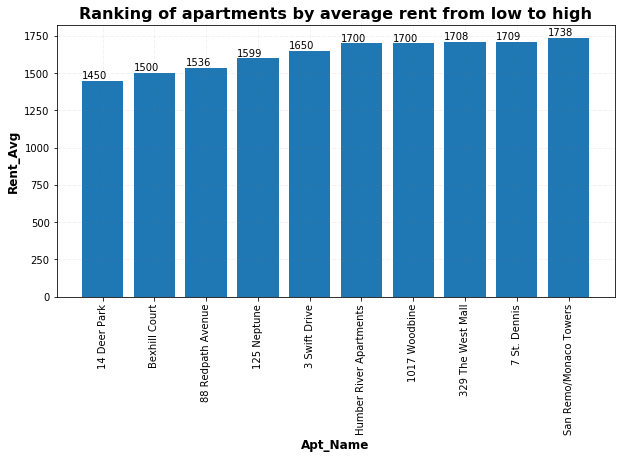

In [299]:
#Create a temp dataframe that will hold the required data in the desired sorted manner
temp_df_rent_avg = apartment_info_combined_info[['Apt_Name', 'Rent_Avg']]
temp_df_rent_avg = temp_df_rent_avg.sort_values('Rent_Avg', axis = 0, ascending = True).reset_index(drop=True)
temp_df_rent_avg = temp_df_rent_avg.loc[:9]
# Now plot the above data to create a bar chart
x = temp_df_rent_avg['Apt_Name']
y = temp_df_rent_avg['Rent_Avg']
#fig = plt.figure(figsize = (12, 8)) 
#plt.xticks(rotation = 90)
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(x, y)
ax.xaxis.set_tick_params(rotation=90)
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
plt.xlabel("Apt_Name", weight='bold',fontsize=12)
plt.ylabel("Rent_Avg",weight='bold',fontsize=12)
# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(height), (x, y + height + 15.25))
ax.set_title('Ranking of apartments by average rent from low to high',fontsize= 16,weight="bold")
plt.show()

#### Display the 10 apartments by average rent ranking from High to Low

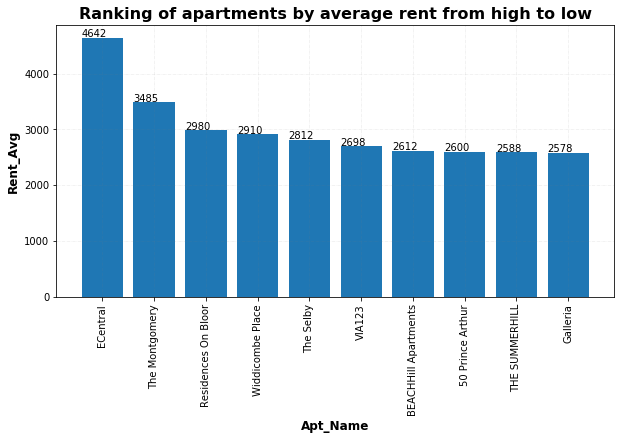

In [300]:
#Create a temp dataframe that will hold the required data in the desired sorted manner
temp_df_rent_avg = apartment_info_combined_info[['Apt_Name', 'Rent_Avg']]
temp_df_rent_avg = temp_df_rent_avg.sort_values('Rent_Avg', axis = 0, ascending = False).reset_index(drop=True)
temp_df_rent_avg = temp_df_rent_avg.loc[:9]
# Now plot the above data to create a bar chart
x = temp_df_rent_avg['Apt_Name']
y = temp_df_rent_avg['Rent_Avg']
#fig = plt.figure(figsize = (12, 8)) 
#plt.xticks(rotation = 90)
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(x, y)
ax.xaxis.set_tick_params(rotation=90)
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
plt.xlabel("Apt_Name", weight='bold',fontsize=12)
plt.ylabel("Rent_Avg",weight='bold',fontsize=12)
# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(height), (x, y + height + 15.25))
ax.set_title('Ranking of apartments by average rent from high to low',fontsize= 16,weight="bold")
plt.show()

#### Display top 5 apartments with accessible parking spaces

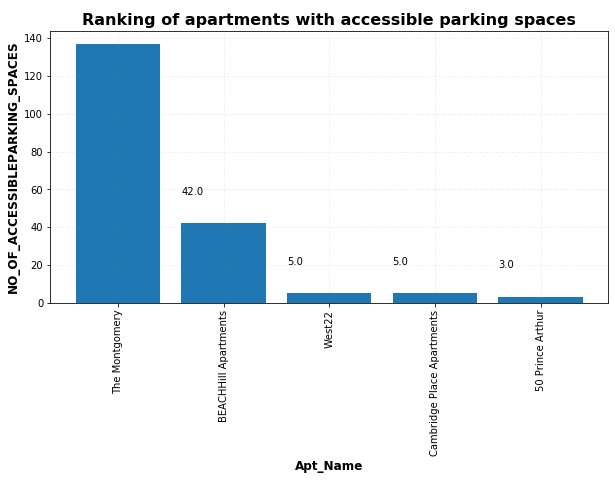

In [301]:
temp_df_rent_avg = apartment_info_combined_info.loc[:,('Apt_Name', 'NO_OF_ACCESSIBLEPARKING_SPACES')]
temp_df_rent_avg['NO_OF_ACCESSIBLEPARKING_SPACES'] = temp_df_rent_avg['NO_OF_ACCESSIBLEPARKING_SPACES'].apply(lambda x: 0.0 if x == '' else x)
temp_df_rent_avg['NO_OF_ACCESSIBLEPARKING_SPACES'] = temp_df_rent_avg['NO_OF_ACCESSIBLEPARKING_SPACES'].astype(float)
temp_df_rent_avg = temp_df_rent_avg.sort_values('NO_OF_ACCESSIBLEPARKING_SPACES', axis = 0, ascending = False).reset_index(drop=True)
temp_df_rent_avg = temp_df_rent_avg.loc[:4]
# Now plot the above data to create a bar chart
x = temp_df_rent_avg['Apt_Name']
y = temp_df_rent_avg['NO_OF_ACCESSIBLEPARKING_SPACES']
#fig = plt.figure(figsize = (12, 8)) 
#plt.xticks(rotation = 90)
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(x, y)
ax.xaxis.set_tick_params(rotation=90)
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
plt.xlabel("Apt_Name", weight='bold',fontsize=12)
plt.ylabel("NO_OF_ACCESSIBLEPARKING_SPACES",weight='bold',fontsize=12)
# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(height), (x, y + height + 15.25))
ax.set_title('Ranking of apartments with accessible parking spaces',fontsize= 16,weight="bold")
plt.show()

#### Display apartments that have an exterior fireescape and fire alarm

In [302]:
temp_df_rent = apartment_info_combined_info.loc[:,('Apt_Name',  'EXTERIOR_FIRE_ESCAPE', 'FIRE_ALARM')]
temp_df_rent = temp_df_rent.loc[(temp_df_rent['EXTERIOR_FIRE_ESCAPE'] >= 'YES') | (temp_df_rent['FIRE_ALARM'] >= 'YES')]
temp_df_rent_fire = temp_df_rent.reset_index(drop=True)
temp_df_rent_fire

,Apt_Name,EXTERIOR_FIRE_ESCAPE,FIRE_ALARM
0,345 Lonsdale,NO,YES
1,140 Carlton,NO,YES
2,Cambridge Place Apartments,NO,YES
3,West22,NO,YES
4,2550 Kingston,NO,YES
5,2560 Kingston,NO,YES
6,The Montgomery,YES,YES
7,VIA123,NO,YES
8,50 Prince Arthur,NO,YES
9,329 The West Mall,NO,YES


## Part 3 -  Clustering of neighborhoods for 'Toronto' boroughs

### Install folium and geopy

In [303]:
pip install folium

In [304]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


### Import necessary packages

In [305]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Create map of Toronto for the selected boroughs and neighborhoods

In [306]:
address = 'Toronto City, ON'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [307]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(apartment_info_combined_info['Latitude'], apartment_info_combined_info['Longitude'], apartment_info_combined_info['Borough'], apartment_info_combined_info['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Define Foursquare Credentials and Version

In [308]:
CLIENT_ID = 'FJHOVC1ZHTWX3BH4XITX1LM2XFIJGZNJRSGRDWKWY1LNCW2U' # your Foursquare ID
CLIENT_SECRET = 'M3KMA23JPOQQDTCUNJH0L5I0H3QSE0EIRUDMUD3ZKJ25HFQ4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: FJHOVC1ZHTWX3BH4XITX1LM2XFIJGZNJRSGRDWKWY1LNCW2U
CLIENT_SECRET:M3KMA23JPOQQDTCUNJH0L5I0H3QSE0EIRUDMUD3ZKJ25HFQ4


In [311]:
#toronto_data = neighborhoods[neighborhoods['Borough'].str.contains("Toronto")].reset_index(drop=True)
toronto_data = apartment_info_combined_info
toronto_data.head()

,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,...,LOCKER_OR_STORAGE_ROOM,PETS_ALLOWED,SITE_ADDRESS,VISITOR_PARKING,YEAR_BUILT,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_ACCESSIBLEPARKING_SPACES,NO_BARRIERFREE_ACCESSBLE_UNITS
0,Kelvingrove Apartments,6 Airdrie Road,1825,2250,M4G 1L7,2038,East York,Leaside,43.709060,-79.363452,...,,,,,,,,,,
1,Arlington Avenue,143 and 145 Arlington Avenue,1800,1850,M6C 2Z3,1825,York,Humewood-Cedarvale,43.693781,-79.428191,...,,,,,,,,,,
2,South Algiers,565 Avenue Road,1884,2475,M4V 2J9,2180,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,...,,,,,,,,,,
3,The Cottingham Manor,291 Avenue Road,1750,1750,M4V 2G9,1750,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,...,,,,,,,,,,
4,Bayview Mews,2911 Bayview Avenue,1950,2850,M2K 1E8,2400,North York,Bayview Village,43.786947,-79.385975,...,,,,,,,,,,


In [312]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(toronto_data['Borough'].unique()),
        toronto_data.shape[0]
    )
)

The dataframe has 9 boroughs and 51 neighborhoods.


In [326]:
#toronto_data_neighbourhoods = toronto_data.loc[:,('Apt_Name','Neighborhood')]
#toronto_data_neighbourhoods['Apt_Count'] = toronto_data.groupby('Neighborhood')['Apt_Name'].value_counts()
toronto_data_neighbourhoods = toronto_data.groupby('Neighborhood')['Apt_Name'].value_counts()
toronto_data_neighbourhoods

Neighborhood                                                             Apt_Name                  
Bathurst Manor, Wilson Heights, Downsview North                          San Remo/Monaco Towers        1
Bayview Village                                                          Bayview Mews                  1
Birch Cliff, Cliffside West                                              2440 Queen Street East        1
                                                                         Queen Street East             1
Church and Wellesley                                                     The Selby                     1
Cliffside, Cliffcrest, Scarborough Village West                          2550 Kingston                 1
                                                                         2560 Kingston                 1
Davisville                                                               88 Redpath Avenue             1
                                                            

### Explore the first neighborhood in our dataframe.

In [327]:
toronto_data.loc[0, 'Neighborhood']

'Leaside'

In [328]:
neighborhood_latitude = toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Leaside are 43.7090604, -79.3634517.


   #### Now, let's get the top 100 venues that are in Leaside within a radius of 500 meters. 
   #### Create the FourSquare URL first and then call it to get the results.

In [329]:
radius = 500
LIMIT =  100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=FJHOVC1ZHTWX3BH4XITX1LM2XFIJGZNJRSGRDWKWY1LNCW2U&client_secret=M3KMA23JPOQQDTCUNJH0L5I0H3QSE0EIRUDMUD3ZKJ25HFQ4&v=20180605&ll=43.7090604,-79.3634517&radius=500&limit=100'

In [330]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f01d280ad353c77ab96a613'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Leaside',
  'headerFullLocation': 'Leaside, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 34,
  'suggestedBounds': {'ne': {'lat': 43.7135604045, 'lng': -79.3572380270639},
   'sw': {'lat': 43.704560395499996, 'lng': -79.3696653729361}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5531956d498e24c6e9994f2e',
       'name': 'Local Leaside',
       'location': {'address': '180 Laird Dr',
        'lat': 43.71001166793114,
        'lng': -79.36351433524794,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.71001166793114,
    

#### Use the get_category_type function to get the category of each venue

In [331]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Clean the json data and put it into a dataframe

In [332]:
from pandas import json_normalize

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Local Leaside,Sports Bar,43.710012,-79.363514
1,Rack Attack,Sporting Goods Shop,43.706934,-79.362261
2,Olde Yorke Fish & Chips,Fish & Chips Shop,43.706141,-79.361829
3,CrossFit Toronto,Gym,43.708100,-79.359060
4,LCBO,Liquor Store,43.710571,-79.360287


In [333]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

34 venues were returned by Foursquare.


### Explore the neighborhooods in Toronto for the apartments shortlisted so far

In [334]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [335]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'].unique(),
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude'])
                                 

Leaside
Humewood-Cedarvale
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Bayview Village
Islington Avenue, Humber Valley Village
Rosedale
Davisville North
Parkwoods
University of Toronto, Harbord
Woodbine Heights
Davisville
Willowdale, Willowdale East
Forest Hill North &amp; West, Forest Hill Road Park
Moore Park, Summerhill East
Weston
Lawrence Manor, Lawrence Heights
High Park, The Junction South
Birch Cliff, Cliffside West
Willowdale, Willowdale West
Church and Wellesley
Bathurst Manor, Wilson Heights, Downsview North
Fairview, Henry Farm, Oriole
Don Mills
Victoria Village
Kingsview Village, St. Phillips, Martin Grove Gardens, Richview Gardens
Downsview
Regent Park, Harbourfront
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
The Beaches


#### Check how many venues were returned for each neighborhood

In [339]:
print(toronto_venues.shape)
toronto_venues.head(50)

(559, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Leaside,43.709060,-79.363452,Local Leaside,43.710012,-79.363514,Sports Bar
1,Leaside,43.709060,-79.363452,Rack Attack,43.706934,-79.362261,Sporting Goods Shop
2,Leaside,43.709060,-79.363452,Olde Yorke Fish & Chips,43.706141,-79.361829,Fish & Chips Shop
3,Leaside,43.709060,-79.363452,CrossFit Toronto,43.708100,-79.359060,Gym
4,Leaside,43.709060,-79.363452,LCBO,43.710571,-79.360287,Liquor Store
5,Leaside,43.709060,-79.363452,Enduro Sport,43.706059,-79.361835,Bike Shop
6,Leaside,43.709060,-79.363452,The Leaside Pub,43.710468,-79.363848,Restaurant
7,Leaside,43.709060,-79.363452,Kintako Japanese Restaurant,43.711597,-79.363962,Sushi Restaurant
8,Leaside,43.709060,-79.363452,Aroma Espresso Bar,43.705611,-79.360775,Coffee Shop
9,Leaside,43.709060,-79.363452,Bulk Barn,43.706116,-79.360541,Grocery Store


In [340]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Bathurst Manor, Wilson Heights, Downsview North",35,35,35,35,35,35
Bayview Village,16,16,16,16,16,16
"Birch Cliff, Cliffside West",1,1,1,1,1,1
Church and Wellesley,1,1,1,1,1,1
"Cliffside, Cliffcrest, Scarborough Village West",77,77,77,77,77,77
Davisville,37,37,37,37,37,37
Davisville North,4,4,4,4,4,4
Don Mills,24,24,24,24,24,24
Downsview,3,3,3,3,3,3


In [341]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 144 uniques categories.


#### Analyze each neighborhood

In [342]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,...,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Video Game Store,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio
0,Leaside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Leaside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Leaside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Leaside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Leaside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [343]:
toronto_onehot.shape

(559, 145)

#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [388]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
#toronto_grouped.dtypes
toronto_grouped

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,...,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Video Game Store,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio
0,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.028571,0.000000,0.000000,0.028571,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bayview Village,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000,0.062500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.062500,0.000000,0.000000,0.000000
2,"Birch Cliff, Cliffside West",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Church and Wellesley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,"Cliffside, Cliffcrest, Scarborough Village West",0.000000,0.012987,0.012987,0.000000,0.012987,0.000000,0.000,0.000000,0.000000,...,0.012987,0.012987,0.012987,0.000000,0.00,0.000000,0.000000,0.012987,0.000000,0.025974
5,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.054054,...,0.000000,0.027027,0.000000,0.000000,0.00,0.027027,0.000000,0.000000,0.000000,0.027027
6,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000
7,Don Mills,0.000000,0.000000,0.000000,0.041667,0.041667,0.000000,0.000,0.000000,0.041667,...,0.083333,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,Downsview,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000,0.062500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.062500,0.000000,0.000000,0.000000


In [345]:
toronto_grouped.shape

(31, 145)

#### Let's print each neighborhood along with the top 5 most common venues

In [346]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bathurst Manor, Wilson Heights, Downsview North----
              venue  freq
0       Pizza Place  0.11
1      Dessert Shop  0.09
2    Sandwich Place  0.09
3  Sushi Restaurant  0.06
4       Coffee Shop  0.06


----Bayview Village----
              venue  freq
0               Pub  0.12
1       Coffee Shop  0.12
2  Sushi Restaurant  0.06
3        Restaurant  0.06
4      Liquor Store  0.06


----Birch Cliff, Cliffside West----
                venue  freq
0              Lawyer   1.0
1   Accessories Store   0.0
2   Martial Arts Dojo   0.0
3         Men's Store   0.0
4  Mexican Restaurant   0.0


----Church and Wellesley----
                      venue  freq
0                      Park   1.0
1         Accessories Store   0.0
2             Movie Theater   0.0
3  Mediterranean Restaurant   0.0
4               Men's Store   0.0


----Cliffside, Cliffcrest, Scarborough Village West----
                 venue  freq
0          Coffee Shop  0.08
1     Sushi Restaurant  0.06
2  Japanese Restaura

#### Function to sort the venues in descending order

In [347]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Display the top 10 venues of each neighborhood

In [348]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor, Wilson Heights, Downsview North",Pizza Place,Sandwich Place,Dessert Shop,Gym,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Indoor Play Area,Seafood Restaurant
1,Bayview Village,Coffee Shop,Pub,Sushi Restaurant,Pizza Place,Liquor Store,Restaurant,Sports Bar,Supermarket,Bank,Light Rail Station
2,"Birch Cliff, Cliffside West",Lawyer,Yoga Studio,Farm,Electronics Store,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop,Department Store
3,Church and Wellesley,Park,Yoga Studio,Department Store,Electronics Store,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop,Deli / Bodega
4,"Cliffside, Cliffcrest, Scarborough Village West",Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Pub,Men's Store,Mediterranean Restaurant,Smoke Shop,Bubble Tea Shop


#### Tenant Preferences
A new exptariate to the city will be looking for certain facilities in a neighborhood prior to renting an aparment. Let's assume that the below parameters are examined by the prospective tenant - there should be public transportation avaialble along with supermarkets, malls and good dining/wining options.The tenant would prefer neighbourhoods where these venues are available and active.



In [431]:
toronto_data_sorted = toronto_data.sort_values('Neighborhood', axis = 0, ascending = False).reset_index(drop=True)
toronto_grouped_sorted = toronto_grouped.sort_values('Neighborhood', axis = 0, ascending = False).reset_index(drop=True)
toronto_tenant_pref = toronto_data_sorted.join(toronto_grouped_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_tenant_pref = toronto_tenant_pref.loc[:,('Apt_Name','Neighborhood','Latitude','Longitude','Bus Station','Bus Stop','Convenience Store', 'Pharmacy',
 'Pizza Place',
 'Grocery Store', 'Liquor Store', 
'Light Rail Station','Bar',
'Shopping Mall')]
toronto_tenant_pref =  toronto_tenant_pref.loc[((toronto_tenant_pref['Light Rail Station'] > 0.000000) | (toronto_tenant_pref['Bus Station'] > 0.000000) | (toronto_tenant_pref['Bus Stop'] > 0.000000))
                                            &  ((toronto_tenant_pref['Convenience Store'] > 0.000000)  | (toronto_tenant_pref['Pizza Place'] > 0.000000)  | (toronto_tenant_pref['Shopping Mall'] > 0.000000)
                                               | (toronto_tenant_pref['Liquor Store'] > 0.000000)) ]
toronto_tenant_pref = toronto_tenant_pref.reset_index(drop=True)
#toronto_tenant_pref

#### Display the preferred neighborhoods on a map

In [438]:
# create map of Toronto using latitude and longitude values
map_tenant_pref = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(toronto_tenant_pref['Latitude'], toronto_tenant_pref['Longitude'], toronto_tenant_pref['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    popup_text = "Test"
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        #popup=popup_text,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tenant_pref)  
    
map_tenant_pref

### Cluster Neighborhoods

#### Run *k*-means to cluster the neighborhood into 5 clusters.

In [349]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 2, 4, 1, 1, 0, 1, 3, 1])

#### Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [350]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Apt_Name,Apt_Street,Rent_Low,Rent_High,Postal_Code,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kelvingrove Apartments,6 Airdrie Road,1825,2250,M4G 1L7,2038,East York,Leaside,43.709060,-79.363452,...,Coffee Shop,Shopping Mall,Burger Joint,Bank,Sporting Goods Shop,Furniture / Home Store,Liquor Store,Department Store,Dessert Shop,Electronics Store
1,Arlington Avenue,143 and 145 Arlington Avenue,1800,1850,M6C 2Z3,1825,York,Humewood-Cedarvale,43.693781,-79.428191,...,Field,Dog Run,Trail,Hockey Arena,Yoga Studio,Department Store,Electronics Store,Distribution Center,Discount Store,Diner
2,South Algiers,565 Avenue Road,1884,2475,M4V 2J9,2180,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,...,Coffee Shop,Pub,Sushi Restaurant,Pizza Place,Liquor Store,Restaurant,Sports Bar,Supermarket,Bank,Light Rail Station
3,The Cottingham Manor,291 Avenue Road,1750,1750,M4V 2G9,1750,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,...,Coffee Shop,Pub,Sushi Restaurant,Pizza Place,Liquor Store,Restaurant,Sports Bar,Supermarket,Bank,Light Rail Station
4,Bayview Mews,2911 Bayview Avenue,1950,2850,M2K 1E8,2400,North York,Bayview Village,43.786947,-79.385975,...,Coffee Shop,Pub,Sushi Restaurant,Pizza Place,Liquor Store,Restaurant,Sports Bar,Supermarket,Bank,Light Rail Station


In [356]:
toronto_merged = toronto_merged.fillna(0)
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)

In [398]:
toronto_data.columns.to_list()

['Apt_Name',
 'Apt_Street',
 'Rent_Low',
 'Rent_High',
 'Postal_Code',
 'Rent_Avg',
 'Borough',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'EXTERIOR_FIRE_ESCAPE',
 'FIRE_ALARM',
 'GARBAGE_CHUTES',
 'BIKE_PARKING',
 'BARRIER_FREE_ACCESSIBILTY_ENTR',
 'LOCKER_OR_STORAGE_ROOM',
 'PETS_ALLOWED',
 'SITE_ADDRESS',
 'VISITOR_PARKING',
 'YEAR_BUILT',
 'NO_OF_STOREYS',
 'IS_THERE_EMERGENCY_POWER?',
 'NON-SMOKING_BUILDING',
 'NO_OF_ACCESSIBLEPARKING_SPACES',
 'NO_BARRIERFREE_ACCESSBLE_UNITS']

In [396]:
toronto_merged_tenant = toronto_merged.loc[:,('Apt_Name', 'Neighborhood',
 'Latitude',
 'Longitude','Bookstore',
'Bus Station',
'Convenience Store',
'Dog Run',
'Grocery Store',
'Gym',
'Gym / Fitness Center',
'Light Rail Station',
'Shopping Mall'
)]
toronto_merged_tenant

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

#### Visualize the clusters

In [357]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine the clusters created

In [363]:
cluster_one = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster_one

,Apt_Street,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,EXTERIOR_FIRE_ESCAPE,FIRE_ALARM,GARBAGE_CHUTES,BIKE_PARKING,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,235 Bloor Street East,2980,Downtown Toronto,Rosedale,43.679563,-79.377529,,,,,...,0,0,0,0,0,0,0,0,0,0
7,136 Broadway Avenue,1800,Central Toronto,Davisville North,43.712751,-79.390197,,,,,...,Park,Playground,Trail,Deli / Bodega,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop,Department Store
21,125 Neptune Drive,1599,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,,,,,...,0,0,0,0,0,0,0,0,0,0
22,22 Oakmount,1900,West Toronto,"High Park, The Junction South",43.661608,-79.464763,,,,,...,Park,Jewelry Store,Trail,Sushi Restaurant,Yoga Studio,Department Store,Dog Run,Distribution Center,Discount Store,Diner
27,15 Roehampton Avenue,4642,Central Toronto,Davisville North,43.712751,-79.390197,,,,,...,Park,Playground,Trail,Deli / Bodega,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop,Department Store


In [366]:
cluster_two = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster_two

,Apt_Street,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,EXTERIOR_FIRE_ESCAPE,FIRE_ALARM,GARBAGE_CHUTES,BIKE_PARKING,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6 Airdrie Road,2038,East York,Leaside,43.709060,-79.363452,,,,,...,Coffee Shop,Shopping Mall,Burger Joint,Bank,Sporting Goods Shop,Furniture / Home Store,Liquor Store,Department Store,Dessert Shop,Electronics Store
1,143 and 145 Arlington Avenue,1825,York,Humewood-Cedarvale,43.693781,-79.428191,,,,,...,Field,Dog Run,Trail,Hockey Arena,Yoga Studio,Department Store,Electronics Store,Distribution Center,Discount Store,Diner
2,565 Avenue Road,2180,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,,,,,...,Coffee Shop,Pub,Sushi Restaurant,Pizza Place,Liquor Store,Restaurant,Sports Bar,Supermarket,Bank,Light Rail Station
3,291 Avenue Road,1750,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,,,,,...,Coffee Shop,Pub,Sushi Restaurant,Pizza Place,Liquor Store,Restaurant,Sports Bar,Supermarket,Bank,Light Rail Station
4,2911 Bayview Avenue,2400,North York,Bayview Village,43.786947,-79.385975,,,,,...,Coffee Shop,Pub,Sushi Restaurant,Pizza Place,Liquor Store,Restaurant,Sports Bar,Supermarket,Bank,Light Rail Station
5,12 Bexhill Court,1500,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242,,,,,...,Café,Bank,Chinese Restaurant,Japanese Restaurant,Electronics Store,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop
8,15 Brookbanks Drive,2008,North York,Parkwoods,43.753259,-79.329656,,,,,...,Gym / Fitness Center,Breakfast Spot,Hotel,Food & Drink Shop,Department Store,Park,Sandwich Place,Pizza Place,Bagel Shop,Farmers Market
9,17 Brookbanks Drive,2525,North York,Parkwoods,43.753259,-79.329656,,,,,...,Gym / Fitness Center,Breakfast Spot,Hotel,Food & Drink Shop,Department Store,Park,Sandwich Place,Pizza Place,Bagel Shop,Farmers Market
12,14 Deer Park Crescent,1450,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,,,,,...,Coffee Shop,Pub,Sushi Restaurant,Pizza Place,Liquor Store,Restaurant,Sports Bar,Supermarket,Bank,Light Rail Station
13,45 Dunfield Avenue,2165,Central Toronto,Davisville,43.704324,-79.388790,,,,,...,Café,Bookstore,Restaurant,Bar,Japanese Restaurant,Italian Restaurant,Bakery,Sandwich Place,Dessert Shop,Chinese Restaurant


In [367]:
cluster_three = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster_three

,Apt_Street,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,EXTERIOR_FIRE_ESCAPE,FIRE_ALARM,GARBAGE_CHUTES,BIKE_PARKING,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,2440 Queen Street East,2250,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,,,,,...,Lawyer,Yoga Studio,Farm,Electronics Store,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop,Department Store
26,12 Rockford Road,1972,North York,"Willowdale, Willowdale West",43.782736,-79.442259,,,,,...,Lawyer,Yoga Studio,Farm,Electronics Store,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop,Department Store
39,3008-3010 Queen Street East,2400,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,,,,,...,Lawyer,Yoga Studio,Farm,Electronics Store,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop,Department Store


In [368]:
cluster_four = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster_four

,Apt_Street,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,EXTERIOR_FIRE_ESCAPE,FIRE_ALARM,GARBAGE_CHUTES,BIKE_PARKING,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,57 Charles Street West,2475,Downtown Toronto,"University of Toronto, Harbord",43.662696,-79.400049,,,,,...,Park,Pool,Food & Drink Shop,Yoga Studio,Department Store,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop
11,2575 Danforth Avenue,1962,East York,Woodbine Heights,43.695344,-79.318389,,,,,...,Park,Pool,Food & Drink Shop,Yoga Studio,Department Store,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop
37,1130 Wilson Avenue,1700,North York,Downsview,43.728496,-79.495697,,,,,...,Park,Pool,Food & Drink Shop,Yoga Studio,Department Store,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop
38,1017 Woodbine Avenue,1700,East York,Woodbine Heights,43.695344,-79.318389,,,,,...,Park,Pool,Food & Drink Shop,Yoga Studio,Department Store,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop


In [369]:
cluster_five = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster_five

,Apt_Street,Rent_Avg,Borough,Neighborhood,Latitude,Longitude,EXTERIOR_FIRE_ESCAPE,FIRE_ALARM,GARBAGE_CHUTES,BIKE_PARKING,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,25 Selby Street,2812,Downtown Toronto,Church and Wellesley,43.66586,-79.38316,,,,,...,Park,Yoga Studio,Department Store,Electronics Store,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop,Deli / Bodega


#### Convert the cluster dataframes to json records so that this data can be consumed by a web-app if required

In [373]:
cluster_one_json = cluster_one.to_json(orient = 'records')
cluster_two_json = cluster_two.to_json(orient = 'records')
cluster_three_json = cluster_three.to_json(orient = 'records')
cluster_four_json = cluster_four.to_json(orient = 'records')
cluster_five_json = cluster_five.to_json(orient = 'records')

In [376]:
cluster_one_json

'[{"Apt_Street":"235 Bloor Street East","Rent_Avg":2980,"Borough":"Downtown Toronto","Neighborhood":"Rosedale","Latitude":43.6795626,"Longitude":-79.3775294,"EXTERIOR_FIRE_ESCAPE":"","FIRE_ALARM":"","GARBAGE_CHUTES":"","BIKE_PARKING":"","BARRIER_FREE_ACCESSIBILTY_ENTR":"","LOCKER_OR_STORAGE_ROOM":"","PETS_ALLOWED":"","SITE_ADDRESS":"","VISITOR_PARKING":"","YEAR_BUILT":"","NO_OF_STOREYS":"","IS_THERE_EMERGENCY_POWER?":"","NON-SMOKING_BUILDING":"","NO_OF_ACCESSIBLEPARKING_SPACES":"","NO_BARRIERFREE_ACCESSBLE_UNITS":"","Cluster Labels":0,"1st Most Common Venue":0,"2nd Most Common Venue":0,"3rd Most Common Venue":0,"4th Most Common Venue":0,"5th Most Common Venue":0,"6th Most Common Venue":0,"7th Most Common Venue":0,"8th Most Common Venue":0,"9th Most Common Venue":0,"10th Most Common Venue":0},{"Apt_Street":"136 Broadway Avenue","Rent_Avg":1800,"Borough":"Central Toronto","Neighborhood":"Davisville North","Latitude":43.7127511,"Longitude":-79.3901975,"EXTERIOR_FIRE_ESCAPE":"","FIRE_ALARM

In [377]:
cluster_two_json

'[{"Apt_Street":"6 Airdrie Road","Rent_Avg":2038,"Borough":"East York","Neighborhood":"Leaside","Latitude":43.7090604,"Longitude":-79.3634517,"EXTERIOR_FIRE_ESCAPE":"","FIRE_ALARM":"","GARBAGE_CHUTES":"","BIKE_PARKING":"","BARRIER_FREE_ACCESSIBILTY_ENTR":"","LOCKER_OR_STORAGE_ROOM":"","PETS_ALLOWED":"","SITE_ADDRESS":"","VISITOR_PARKING":"","YEAR_BUILT":"","NO_OF_STOREYS":"","IS_THERE_EMERGENCY_POWER?":"","NON-SMOKING_BUILDING":"","NO_OF_ACCESSIBLEPARKING_SPACES":"","NO_BARRIERFREE_ACCESSBLE_UNITS":"","Cluster Labels":1,"1st Most Common Venue":"Coffee Shop","2nd Most Common Venue":"Shopping Mall","3rd Most Common Venue":"Burger Joint","4th Most Common Venue":"Bank","5th Most Common Venue":"Sporting Goods Shop","6th Most Common Venue":"Furniture \\/ Home Store","7th Most Common Venue":"Liquor Store","8th Most Common Venue":"Department Store","9th Most Common Venue":"Dessert Shop","10th Most Common Venue":"Electronics Store"},{"Apt_Street":"143 and 145 Arlington Avenue","Rent_Avg":1825,"

In [378]:
cluster_three_json

'[{"Apt_Street":"2440 Queen Street East","Rent_Avg":2250,"Borough":"Scarborough","Neighborhood":"Birch Cliff, Cliffside West","Latitude":43.692657,"Longitude":-79.2648481,"EXTERIOR_FIRE_ESCAPE":"","FIRE_ALARM":"","GARBAGE_CHUTES":"","BIKE_PARKING":"","BARRIER_FREE_ACCESSIBILTY_ENTR":"","LOCKER_OR_STORAGE_ROOM":"","PETS_ALLOWED":"","SITE_ADDRESS":"","VISITOR_PARKING":"","YEAR_BUILT":"","NO_OF_STOREYS":"","IS_THERE_EMERGENCY_POWER?":"","NON-SMOKING_BUILDING":"","NO_OF_ACCESSIBLEPARKING_SPACES":"","NO_BARRIERFREE_ACCESSBLE_UNITS":"","Cluster Labels":2,"1st Most Common Venue":"Lawyer","2nd Most Common Venue":"Yoga Studio","3rd Most Common Venue":"Farm","4th Most Common Venue":"Electronics Store","5th Most Common Venue":"Dog Run","6th Most Common Venue":"Distribution Center","7th Most Common Venue":"Discount Store","8th Most Common Venue":"Diner","9th Most Common Venue":"Dessert Shop","10th Most Common Venue":"Department Store"},{"Apt_Street":"12 Rockford Road","Rent_Avg":1972,"Borough":"No

In [379]:
cluster_four_json

'[{"Apt_Street":"57 Charles Street West","Rent_Avg":2475,"Borough":"Downtown Toronto","Neighborhood":"University of Toronto, Harbord","Latitude":43.6626956,"Longitude":-79.4000493,"EXTERIOR_FIRE_ESCAPE":"","FIRE_ALARM":"","GARBAGE_CHUTES":"","BIKE_PARKING":"","BARRIER_FREE_ACCESSIBILTY_ENTR":"","LOCKER_OR_STORAGE_ROOM":"","PETS_ALLOWED":"","SITE_ADDRESS":"","VISITOR_PARKING":"","YEAR_BUILT":"","NO_OF_STOREYS":"","IS_THERE_EMERGENCY_POWER?":"","NON-SMOKING_BUILDING":"","NO_OF_ACCESSIBLEPARKING_SPACES":"","NO_BARRIERFREE_ACCESSBLE_UNITS":"","Cluster Labels":3,"1st Most Common Venue":"Park","2nd Most Common Venue":"Pool","3rd Most Common Venue":"Food & Drink Shop","4th Most Common Venue":"Yoga Studio","5th Most Common Venue":"Department Store","6th Most Common Venue":"Dog Run","7th Most Common Venue":"Distribution Center","8th Most Common Venue":"Discount Store","9th Most Common Venue":"Diner","10th Most Common Venue":"Dessert Shop"},{"Apt_Street":"2575 Danforth Avenue","Rent_Avg":1962,"B

In [380]:
cluster_five_json

'[{"Apt_Street":"25 Selby Street","Rent_Avg":2812,"Borough":"Downtown Toronto","Neighborhood":"Church and Wellesley","Latitude":43.6658599,"Longitude":-79.3831599,"EXTERIOR_FIRE_ESCAPE":"","FIRE_ALARM":"","GARBAGE_CHUTES":"","BIKE_PARKING":"","BARRIER_FREE_ACCESSIBILTY_ENTR":"","LOCKER_OR_STORAGE_ROOM":"","PETS_ALLOWED":"","SITE_ADDRESS":"","VISITOR_PARKING":"","YEAR_BUILT":"","NO_OF_STOREYS":"","IS_THERE_EMERGENCY_POWER?":"","NON-SMOKING_BUILDING":"","NO_OF_ACCESSIBLEPARKING_SPACES":"","NO_BARRIERFREE_ACCESSBLE_UNITS":"","Cluster Labels":4,"1st Most Common Venue":"Park","2nd Most Common Venue":"Yoga Studio","3rd Most Common Venue":"Department Store","4th Most Common Venue":"Electronics Store","5th Most Common Venue":"Dog Run","6th Most Common Venue":"Distribution Center","7th Most Common Venue":"Discount Store","8th Most Common Venue":"Diner","9th Most Common Venue":"Dessert Shop","10th Most Common Venue":"Deli \\/ Bodega"}]'